In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("scatter_data.csv")
df=data


In [12]:
# Use boolean indexing to filter and keep rows that don't start with '%'
df = df[~df['% x'].astype(str).str.startswith('%')]
df.head
df.dtypes

% x    float64
 y     float64
dtype: object

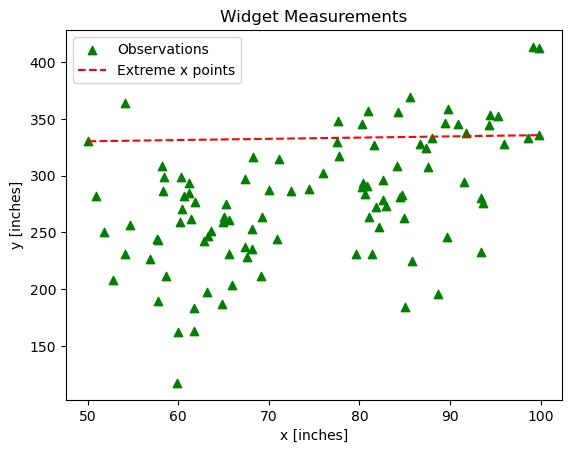

In [13]:
plt.scatter(df['% x'], df[' y '], marker='^', color='green', label='Observations')
x_min = df['% x'].min()
x_max = df['% x'].max()

plt.plot([x_min, x_max], [df.loc[df['% x'] == x_min, ' y '].values[0], df.loc[df['% x'] == x_max, ' y '].values[0]], 'r--', label='Extreme x points')
# Set title and axis labels
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.legend()
plt.show()

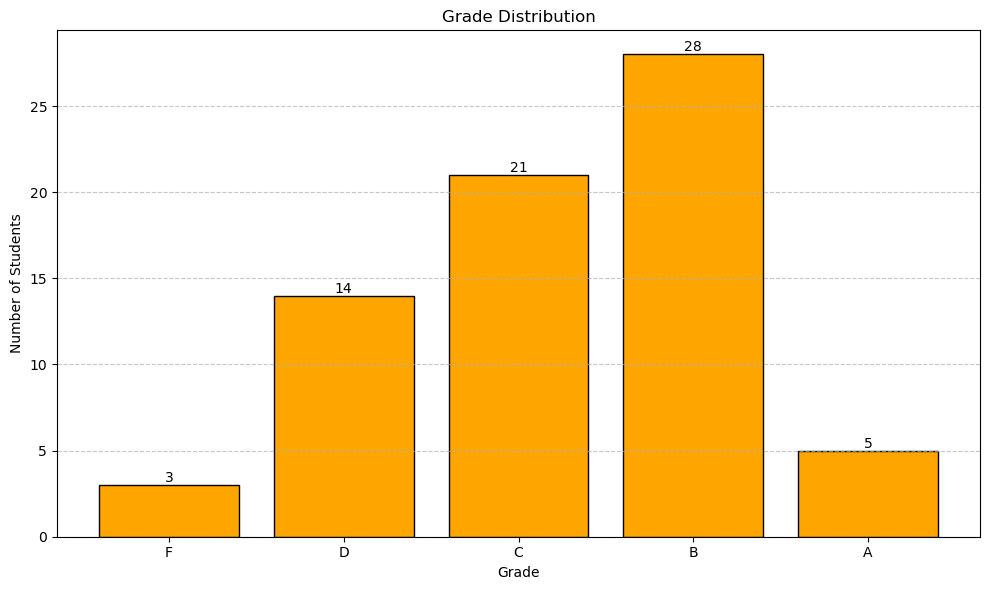

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("student_grades.csv")
data.columns
df=data
df = df[~df['% studentID'].astype(str).str.startswith('%')]

# Define the bins and labels for the histogram
bins = [0, 60, 70, 80, 90, 100]
BinLabels = ['F', 'D', 'C', 'B', 'A']

# Categorize 'avgScore' into letter grades
df['letterGrade'] = pd.cut(df[' avgScore '], bins=bins, labels=BinLabels, right=False, include_lowest=True)

# Count the number of students in each grade
gradeCount = df['letterGrade'].value_counts().reindex(BinLabels, fill_value=0)

# Plot setup
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(gradeCount.index, gradeCount.values, color='orange', edgecolor='black')

# Adding counts above bars
for i, count in enumerate(gradeCount.values):
    plt.text(i, count, str(count), fontsize=10, color='black', ha='center', va='bottom')

# Setting x-axis ticks to align with bars
plt.xticks(range(len(BinLabels)), BinLabels)

# Axis labels and plot title
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Grade Distribution')

# Adding a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust plot layout
plt.tight_layout()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv("solution_data.csv")

data = data[~data['% Problem'].astype(str).str.startswith('%')]

# Define the heuristics and their labels
heuristics = ["genetic algorithm", "simulated annealing", "tabu search"]
# Calculate the optimality gaps for non-"optimal" approaches
opt=data.groupby("% Problem")["Value"].max().reset_index()
opt.rename(columns={'Value':'Opt_Value'},inplace=True)
data=data.merge(opt,on='% Problem',how='left')

data["Optimality Gap"] = ((data["Opt_Value"]-data["Value"])/data["Opt_Value"])*100
data = data[data["SolnMethod"] != "optimal"]
data.head()










,% Problem,SolnMethod,Value,Opt_Value,Optimality Gap
0,0,genetic algorithm,112.749860,166.170172,32.147955
1,0,simulated annealing,75.220917,166.170172,54.732600
2,0,tabu search,111.574225,166.170172,32.855444
4,1,genetic algorithm,31.819762,48.634470,34.573643
5,1,simulated annealing,34.014603,48.634470,30.060710


In [16]:
grp=data.groupby('SolnMethod')['Optimality Gap'].apply(list)
soln=grp.to_dict()
d1=pd.DataFrame(soln)
d1.head()


,genetic algorithm,simulated annealing,tabu search
0,32.147955,54.732600,32.855444
1,34.573643,30.060710,15.651159
2,34.027413,56.900812,44.991033
3,32.186970,48.344138,24.379735
4,32.819833,56.088454,23.033096


C:\Users\sneha\AppData\Local\Temp\ipykernel_31868\3936788381.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(heuristics)


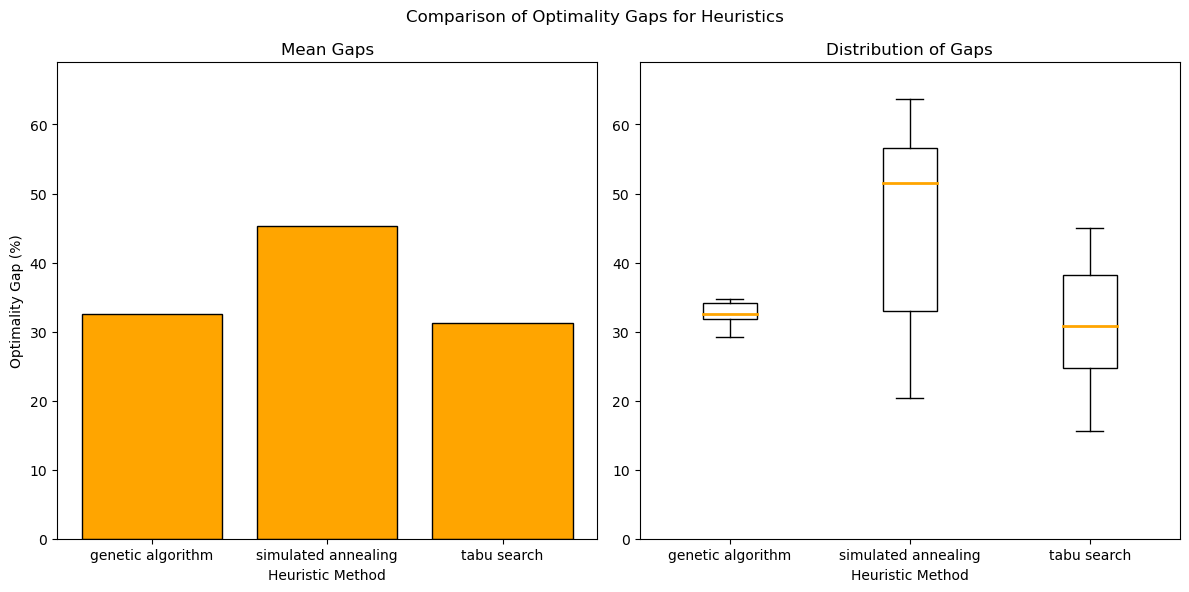

In [17]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Barplot of Average Optimality Gaps
axs[0].bar(heuristics, data.groupby("SolnMethod")["Optimality Gap"].mean(), color='orange', edgecolor='black')
axs[0].set_xticklabels(heuristics)
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_title('Mean Gaps')
axs[0].set_ylim(0,69)

# Subplot 2: Boxplot of Optimality Gap Spread
box = axs[1].boxplot(d1, patch_artist=True, labels=heuristics)
axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')
axs[1].set_ylim(0,69)
axs[0].set_ylim(axs[1].get_ylim())


# Coloring the median line of the boxplot orange
for median in box['medians']:
    median.set(color='orange', linewidth=2)

# Setting the background color for the boxplot
for patch in box['boxes']:
    patch.set_facecolor('white')


# Set a common title for the figure
fig.suptitle('Comparison of Optimality Gaps for Heuristics', fontsize=12)

# Display the figure
plt.tight_layout()
plt.show()


dataset Link: https://www.kaggle.com/datasets/yasserh/titanic-dataset
link for plot type 1: https://seaborn.pydata.org/examples/spreadsheet_heatmap.html
link for plot type 2: https://seaborn.pydata.org/examples/wide_form_violinplot.html
link for plot type 3: https://seaborn.pydata.org/examples/scatterplot_categorical.html       

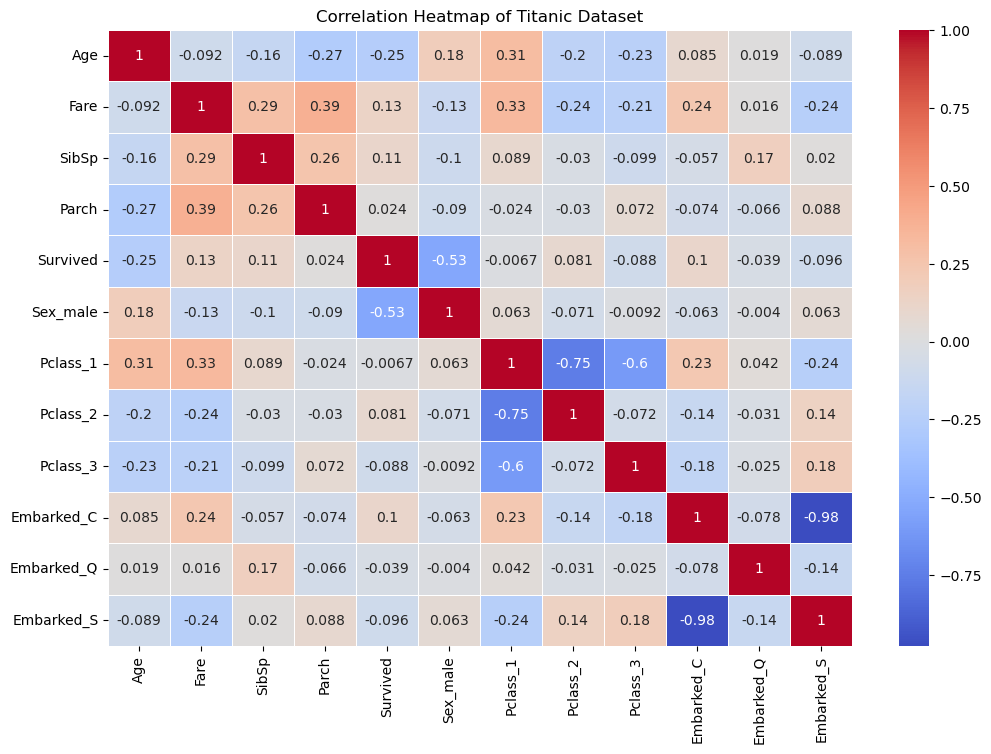

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Example data preprocessing steps
# Drop rows with missing values
df = df.dropna()

# Encode categorical variables if needed
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])

# Select the columns for the heatmap
columns_for_heatmap = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df_for_heatmap = df[columns_for_heatmap]

# Create a correlation matrix
correlation_matrix = df_for_heatmap.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

